# Data Cleaning and Feature Generation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as pyplot
import datetime
import textstat


In [2]:
raw_data = pd.read_csv('../data/raw/capstone_raw.csv', usecols=range(2,11))
raw_data.head()

,article_url,author,claps,publication,published_date,read_time,responses,subtitle,title
0,https://medium.com/swlh/10-bestseller-books-to...,Som Bathla,730,The Startup,1.514765e+12,11,3,NaN,10 Wonderful Books That Will Massively Improve...
1,https://medium.com/swlh/how-i-switched-from-io...,Maciej Lipiec,2000,The Startup,1.514765e+12,6,19,NaN,How I Switched from iOS to Android and I’m Enj...
2,https://medium.com/swlh/i-launched-a-tech-star...,Paul Lemley,1300,The Startup,1.514765e+12,18,9,NaN,I Launched A Tech Startup In 2017: Here’s Ever...
3,https://medium.com/swlh/how-airbnb-is-putting-...,Clark Boyd,973,The Startup,1.514765e+12,8,4,NaN,How Airbnb is putting AMP at the core of its d...
4,https://medium.com/swlh/if-you-arent-doing-the...,Aram Rasa Taghavi,884,The Startup,1.514765e+12,9,7,NaN,"If You Aren’t Doing These 7 Things, You’re On ..."


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44909 entries, 0 to 44908
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   article_url     44898 non-null  object 
 1   author          44382 non-null  object 
 2   claps           44909 non-null  int64  
 3   publication     44909 non-null  object 
 4   published_date  44909 non-null  float64
 5   read_time       44909 non-null  int64  
 6   responses       44909 non-null  object 
 7   subtitle        5776 non-null   object 
 8   title           44787 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.1+ MB


In [4]:
raw_data.dropna(subset=(['title']), inplace=True)
cleaned_data = raw_data.copy()
cleaned_data['published_date'] = cleaned_data['published_date'].map(lambda x: datetime.datetime.fromtimestamp(int(float(x) / 1000.0)))
cleaned_data['author'].fillna('', inplace=True)
cleaned_data['subtitle'].fillna('', inplace=True)
cleaned_data['combined_titles'] = (cleaned_data.title + cleaned_data.subtitle).str.strip()
cleaned_data['flesch_kincaid_grade_level'] = cleaned_data['combined_titles'].map(lambda x: textstat.flesch_kincaid_grade(x))
cleaned_data['years'] = cleaned_data['published_date'].apply(lambda x: x.year)
cleaned_data['months'] = cleaned_data['published_date'].apply(lambda x: x.month)

cleaned_data.drop(cleaned_data[cleaned_data['years'] == 2017 ].index, inplace=True)
cleaned_data['responses'] = pd.to_numeric(cleaned_data['responses'], errors='coerce')


In [5]:
cleaned_data.head()

,article_url,author,claps,publication,published_date,read_time,responses,subtitle,title,combined_titles,flesch_kincaid_grade_level,years,months
27,https://medium.com/swlh/playing-with-word-vect...,Martin Konicek,1600,The Startup,2018-01-23 19:00:00,9,16.0,,Playing with word vectors,Playing with word vectors,1.3,2018,1
28,https://medium.com/swlh/the-ultimate-guide-to-...,Fran Conejos,1400,The Startup,2018-01-23 19:00:00,11,13.0,,The Ultimate Guide to Chatbots for Lead Genera...,The Ultimate Guide to Chatbots for Lead Genera...,8.8,2018,1
29,https://medium.com/swlh/one-year-of-coding-got...,lauren lee,3100,The Startup,2018-01-22 19:00:00,9,21.0,,One year of Coding got me HERE,One year of Coding got me HERE,-1.2,2018,1
30,https://medium.com/swlh/basic-b-tchs-guide-to-...,Vi,1800,The Startup,2018-01-22 19:00:00,7,3.0,,Basic B*tch’s Guide to Growing Money,Basic B*tch’s Guide to Growing Money,2.1,2018,1
31,https://medium.com/swlh/git-as-the-newbies-lea...,Hoppy Bouasavanh,1000,The Startup,2018-01-22 19:00:00,4,3.0,,4 Reasons Why Beginning Programmers Should Use...,4 Reasons Why Beginning Programmers Should Use...,5.2,2018,1


In [180]:
cleaned_data.groupby('publication').size()

publication
HackerNoon.com         12337
Human Parts             1391
Mission.org             2661
Personal Growth          647
Startup Grind            405
The Startup            26714
The Washington Post      341
Twitch Blog              237
dtype: int64

In [6]:
cleaned_data.describe()

,claps,read_time,responses,flesch_kincaid_grade_level,years,months
count,44733.000000,44733.000000,44731.000000,44733.000000,44733.000000,44733.000000
mean,521.138354,6.223817,2.943261,6.386098,2019.211656,6.322625
std,3300.800134,3.618336,14.171428,4.906948,0.901057,3.419786
min,0.000000,0.000000,0.000000,-15.700000,2018.000000,1.000000
25%,59.000000,4.000000,0.000000,3.200000,2018.000000,4.000000
50%,123.000000,5.000000,0.000000,6.000000,2020.000000,6.000000
75%,296.000000,7.000000,2.000000,9.200000,2020.000000,9.000000
max,294000.000000,146.000000,999.000000,55.600000,2020.000000,12.000000


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import linear_kernel
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize

In [8]:
# Download stopwords list
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jglenister/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jglenister/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jglenister/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jglenister/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
# Interface lemma tokenizer from nltk with sklearn
import re
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        regex_num_punctuation = r'(\d+)|([^[A-Za-z0-9]\s)'
        regex_little_words = r'(\b\w{1,2}\b)'
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) 
                if not re.search(regex_num_punctuation, t) and not re.search(regex_little_words, t)]


In [10]:
# Lemmatize the stop words
tokenizer=LemmaTokenizer()
token_stop = tokenizer(' '.join(stop_words))
vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=token_stop)

In [11]:
cleaned_data['combined_lower'] = cleaned_data['combined_titles'].str.lower()

In [12]:
tf_idf = vectorizer.fit_transform(cleaned_data['combined_lower'])
vectorizer.get_feature_names_out()

array(['!', '#', '$', ..., '🦄', '🦔', '🦠'], dtype=object)

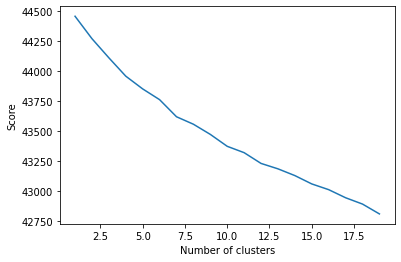

In [13]:
def elbow_method_kmeans(text_vector, max_cluster=15):

    clusters = range(1, max_cluster)
    kmeans = [KMeans(n_clusters=i, max_iter=600, random_state=45) for i in clusters]
    scores = [-1 * (kmean.fit(text_vector).score(text_vector)) for kmean in kmeans]

    pyplot.plot(clusters, scores)
    pyplot.xlabel('Number of clusters')
    pyplot.ylabel('Score')
    pyplot.show()

elbow_method_kmeans(tf_idf, 20)

In [14]:
kmeans = KMeans(n_clusters=13, max_iter=600, random_state=45)
cluster_model = kmeans.fit_predict(tf_idf)

In [15]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        words = [labels[t] for t in np.argsort(r)[-n_terms:]]
        print(' | '.join(words))

In [16]:
get_top_keywords(tf_idf, cluster_model, vectorizer.get_feature_names_out(), 15)


Cluster 0
’ | big | scientist | model | structure | python | analysis | ? | using | : | deep | science | machine | learning | data

Cluster 1
javascript | startup | work | build | python | app | thing | writing | business | life | react | make | way | using | .

Cluster 2
crypto | security | new | . | , | javascript | startup | guide | part | & | biggest | cryptosphere | ’ | story | :

Cluster 3
! | & | data | javascript | . | python | using | — | , | ? | ’ | : | part | ( | )

Cluster 4
get | future | time | business | startup | bitcoin | make | work | really | . | want | , | : | ’ | ?

Cluster 5
basic | javascript | crypto | & | edge | python | react | , | : | . | news | ? | ’ | part | —

Cluster 6
time | make | business | startup | blockchain | work | crypto | — | : | ? | . | , | ’ | ” | “

Cluster 7
like | work | ? | people | make | writer | know | thing | time | let | guide | , | ‘ | . | ’

Cluster 8
important | business | . | month | startup | first | leadership | life | : | writ

In [17]:
data_with_cluster = cleaned_data.copy()
data_with_cluster['cluster'] = cluster_model
data_with_cluster.to_csv('../data/processed/data_with_cluster.csv')

# Exploratory Analysis

In [18]:
import pathlib

def boxplotting(cols, data, _path):
    for col in cols:
        ax = sns.boxplot(x=data[col])
        name = col.replace('_', ' ').title()
        ax.set_title(name)

        pyplot.savefig(_path / f'{col}_whisker.png')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [65]:
c = data_with_cluster.groupby('publication')['claps']
c.head()

27        1600
28        1400
29        3100
30        1800
31        1000
26820      723
26821      292
26822      748
26823       35
26824     1300
27161        8
27162     9500
27163    17100
27164     2000
27165      265
29849     9400
29850     1700
29851      925
29852      223
29853      626
31242       16
31243        4
31244      567
31245       65
31246     1600
31480    24000
31481     2400
31482     6200
31483     5200
31484    17900
32129    23000
32130     1700
32131     3800
32132      554
32133     2900
44500      114
44501      649
44502      115
44503      193
44504     1600
Name: claps, dtype: int64

In [134]:
data_with_cluster['engaging'] = data_with_cluster.groupby('publication')['claps'].transform(lambda x: x.mean() ) <= data_with_cluster['claps'] 

In [37]:
print(data_with_cluster.describe())
print(data_with_cluster.head())


               claps     read_time     responses  flesch_kincaid_grade_level  \
count   44733.000000  44733.000000  44731.000000                44733.000000   
mean      521.138354      6.223817      2.943261                    6.386098   
std      3300.800134      3.618336     14.171428                    4.906948   
min         0.000000      0.000000      0.000000                  -15.700000   
25%        59.000000      4.000000      0.000000                    3.200000   
50%       123.000000      5.000000      0.000000                    6.000000   
75%       296.000000      7.000000      2.000000                    9.200000   
max    294000.000000    146.000000    999.000000                   55.600000   

              years        months       cluster  
count  44733.000000  44733.000000  44733.000000  
mean    2019.211656      6.322625      3.381575  
std        0.901057      3.419786      3.350477  
min     2018.000000      1.000000      0.000000  
25%     2018.000000      4.00

Text(0.5, 1.0, 'Claps')

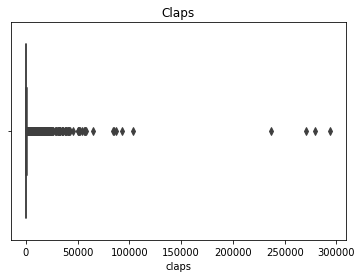

In [38]:
ax = sns.boxplot(x=data_with_cluster['claps'])
ax.set_title('Claps')

Text(0.5, 1.0, 'Read Time')

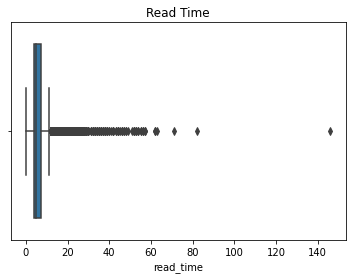

In [39]:
ax = sns.boxplot(x=data_with_cluster['read_time'])
ax.set_title('Read Time')

Text(0.5, 1.0, 'Flesch Kincaid Grade Level')

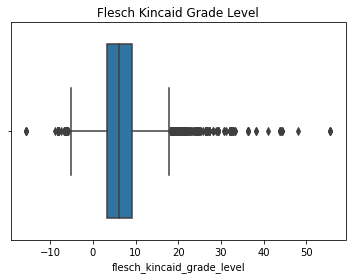

In [40]:
ax = sns.boxplot(x=data_with_cluster['flesch_kincaid_grade_level'])
ax.set_title('Flesch Kincaid Grade Level')

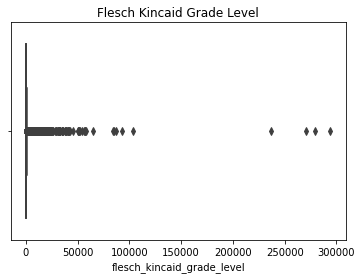

In [41]:
boxplotting(['claps', 'read_time', 'responses','flesch_kincaid_grade_level'], data_with_cluster, pathlib.Path('../images/'))

In [135]:
from scipy.stats import zscore
data_with_cluster['zscore_flesch'] = np.abs(zscore(data_with_cluster['flesch_kincaid_grade_level']))
data_with_cluster['zscore_time'] = np.abs(zscore(data_with_cluster['read_time']))
df_final = data_with_cluster[(data_with_cluster['zscore_flesch'] < 3) & (data_with_cluster['zscore_time'] < 3)].copy()



In [118]:
df_final.describe()

,claps,read_time,responses,flesch_kincaid_grade_level,years,months,cluster,zscore_flesch,zscore_time
count,43784.000000,43784.000000,43782.000000,43784.000000,43784.000000,43784.000000,43784.000000,43784.000000,43784.000000
mean,511.212543,5.979993,2.877096,6.221974,2019.212361,6.321350,3.390782,0.730971,0.588721
std,3292.872078,2.719069,13.993221,4.546289,0.901309,3.420885,3.353438,0.570272,0.471869
min,0.000000,0.000000,0.000000,-8.200000,2018.000000,1.000000,0.000000,0.002833,0.061857
25%,59.000000,4.000000,0.000000,2.900000,2018.000000,4.000000,1.000000,0.247387,0.214516
50%,123.000000,5.000000,0.000000,6.000000,2020.000000,6.000000,1.000000,0.628931,0.490889
75%,294.000000,7.000000,2.000000,9.200000,2020.000000,9.000000,5.000000,1.042188,0.767263
max,294000.000000,17.000000,999.000000,21.000000,2020.000000,12.000000,12.000000,2.978240,2.978249


In [42]:
def countplotting(x, df, y=None, path=None):
    for col in x:
        ax = sns.countplot(x=col, data=df, hue=y)
        ax.set_title(col.replace('_', ' ').title())
        for p, q in enumerate(ax.patches):
            height = q.get_height()
            ax.text(q.get_x()+q.get_width()/2., height + 20, height, ha="center")

        name = '_comparison' if y else ''
        name = f'{col}_countplot{name}.png'
        pyplot.savefig(path / name)


count    18785.000000
mean         2.381315
std          7.586061
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        529.000000
dtype: float64

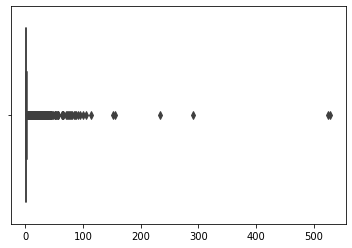

In [43]:
a = data_with_cluster.groupby('author').size().sort_values(ascending=False)
ax = sns.boxplot(x=a)
a.describe()

In [44]:
data_with_cluster[['claps', 'read_time', 'responses', 'flesch_kincaid_grade_level']].describe()

,claps,read_time,responses,flesch_kincaid_grade_level
count,44733.000000,44733.000000,44731.000000,44733.000000
mean,521.138354,6.223817,2.943261,6.386098
std,3300.800134,3.618336,14.171428,4.906948
min,0.000000,0.000000,0.000000,-15.700000
25%,59.000000,4.000000,0.000000,3.200000
50%,123.000000,5.000000,0.000000,6.000000
75%,296.000000,7.000000,2.000000,9.200000
max,294000.000000,146.000000,999.000000,55.600000


In [45]:
data_with_cluster.columns.values

array(['article_url', 'author', 'claps', 'publication', 'published_date',
       'read_time', 'responses', 'subtitle', 'title', 'combined_titles',
       'flesch_kincaid_grade_level', 'years', 'months', 'combined_lower',
       'cluster', 'engaging'], dtype=object)

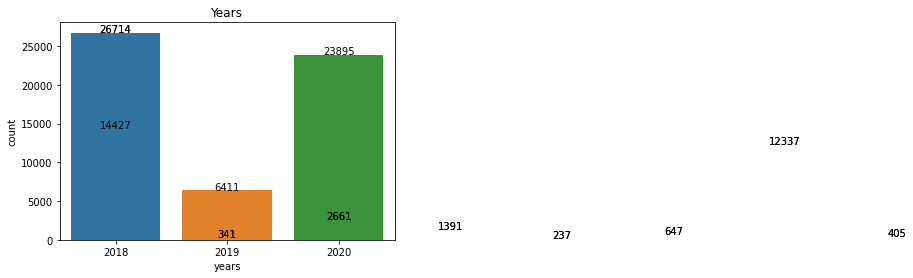

In [46]:
cols = ['publication', 'years']
countplotting(cols, data_with_cluster, path=pathlib.Path('../images/'))

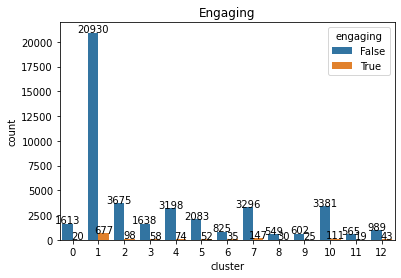

In [47]:
ax = sns.countplot(x='cluster', data=data_with_cluster, hue='engaging')
ax.set_title('engaging'.replace('_', ' ').title())
for p, q in enumerate(ax.patches):
    height = q.get_height()
    ax.text(q.get_x()+q.get_width()/2., height + 20, height, ha="center")
pyplot.savefig(pathlib.Path('../images') / 'cluster_countplot_comparison.png')

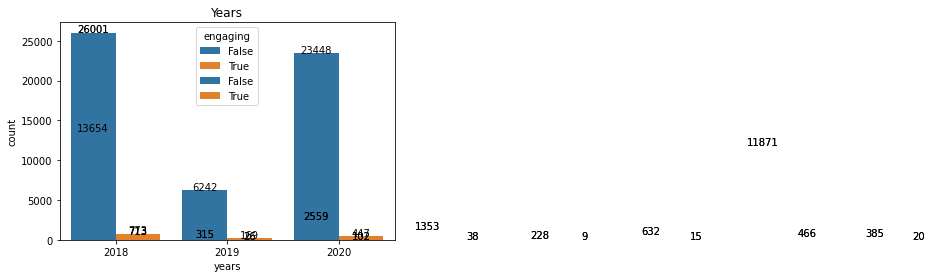

In [48]:
countplotting(cols, data_with_cluster, y='engaging', path=pathlib.Path('../images/'))


Text(0.5, 1.0, 'Flesch-Kincaid Grade Level')

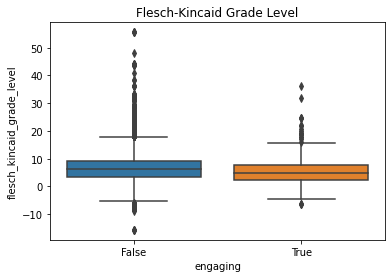

In [49]:
ax = sns.boxplot(x='engaging', y='flesch_kincaid_grade_level', data=data_with_cluster)
ax.set_title('Flesch-Kincaid Grade Level')

Text(0.5, 1.0, 'Reading Time')

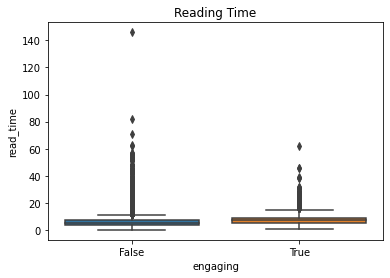

In [52]:
ax = sns.boxplot(x='engaging', y='read_time', data=data_with_cluster)
ax.set_title('Reading Time')

# Finalized Data Graphs

In [137]:
df_final['engaging'] = df_final.groupby('publication')['claps'].transform(lambda x: x.mean() ) <= df_final['claps'] 
df_final.head()

,article_url,author,claps,publication,published_date,read_time,responses,subtitle,title,combined_titles,flesch_kincaid_grade_level,years,months,combined_lower,cluster,engaging,zscore_flesch,zscore_time
27,https://medium.com/swlh/playing-with-word-vect...,Martin Konicek,1600,The Startup,2018-01-23 19:00:00,9,16.0,,Playing with word vectors,Playing with word vectors,1.3,2018,1,playing with word vectors,1,True,1.036521,0.767263
28,https://medium.com/swlh/the-ultimate-guide-to-...,Fran Conejos,1400,The Startup,2018-01-23 19:00:00,11,13.0,,The Ultimate Guide to Chatbots for Lead Genera...,The Ultimate Guide to Chatbots for Lead Genera...,8.8,2018,1,the ultimate guide to chatbots for lead genera...,1,True,0.491941,1.320009
29,https://medium.com/swlh/one-year-of-coding-got...,lauren lee,3100,The Startup,2018-01-22 19:00:00,9,21.0,,One year of Coding got me HERE,One year of Coding got me HERE,-1.2,2018,1,one year of coding got me here,1,True,1.546008,0.767263
30,https://medium.com/swlh/basic-b-tchs-guide-to-...,Vi,1800,The Startup,2018-01-22 19:00:00,7,3.0,,Basic B*tch’s Guide to Growing Money,Basic B*tch’s Guide to Growing Money,2.1,2018,1,basic b*tch’s guide to growing money,7,True,0.873485,0.214516
31,https://medium.com/swlh/git-as-the-newbies-lea...,Hoppy Bouasavanh,1000,The Startup,2018-01-22 19:00:00,4,3.0,,4 Reasons Why Beginning Programmers Should Use...,4 Reasons Why Beginning Programmers Should Use...,5.2,2018,1,4 reasons why beginning programmers should use...,6,True,0.241721,0.614603


In [138]:
engaging = df_final['engaging'][df_final['engaging'] == True ]
print(f'Engagement: {engaging.shape[0] / df_final.shape[0] * 100:.2f}%')

Engagement: 19.83%


Text(0.5, 1.0, 'Reading Time')

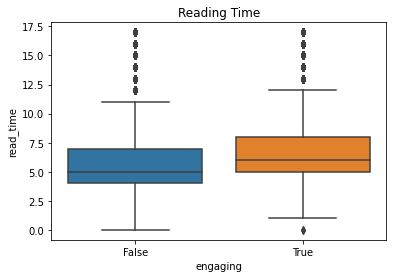

In [139]:
ax = sns.boxplot(x='engaging', y='read_time', data=df_final)
ax.set_title('Reading Time')

Text(0.5, 1.0, 'Flesch Kincaid Grade Level')

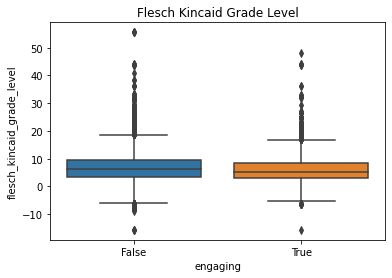

In [140]:
ax = sns.boxplot(x='engaging', y='flesch_kincaid_grade_level', data=data_with_cluster)
ax.set_title('Flesch Kincaid Grade Level')

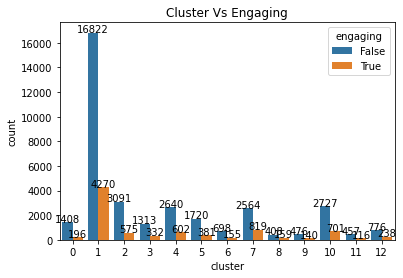

In [142]:
ax = sns.countplot(x='cluster', data=df_final, hue='engaging')
ax.set_title('cluster vs engaging'.replace('_', ' ').title())
for p, q in enumerate(ax.patches):
    height = q.get_height()
    ax.text(q.get_x()+q.get_width()/2., height + 20, height, ha="center")

Linear Regression

In [145]:
df_final.drop(['article_url', 'author', 'claps', 'publication', 'published_date', 'responses', 'subtitle', 'title', 'combined_titles', 'years', 'months', 'combined_lower', 'zscore_flesch', 'zscore_time'], axis=1, inplace=True)

In [153]:
df_dummies = pd.get_dummies(df_final, columns=['cluster'], drop_first=True)


In [161]:
y = df_dummies['engaging'].values
X = df_dummies.drop('engaging', axis=1)

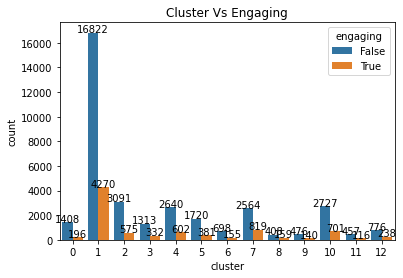

In [ ]:
ax = sns.countplot(x='cluster', data=df_final, hue='engaging')
ax.set_title('cluster vs engaging'.replace('_', ' ').title())
for p, q in enumerate(ax.patches):
    height = q.get_height()
    ax.text(q.get_x()+q.get_width()/2., height + 20, height, ha="center")

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [164]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
result = model.fit(X_train, y_train )

In [165]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, prediction_test))

0.8040424803014731


AxesSubplot(0.125,0.125;0.775x0.755)


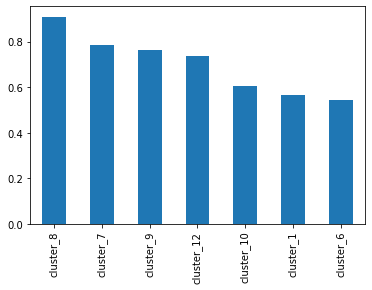

In [168]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print(weights.sort_values(ascending = False)[:7].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


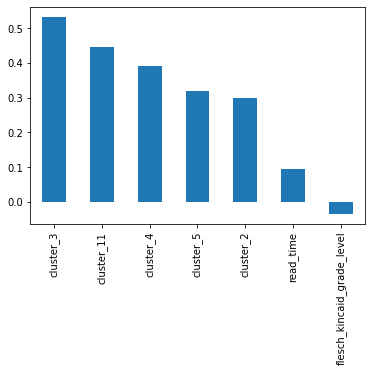

In [169]:
print(weights.sort_values(ascending = False)[-7:].plot(kind='bar'))
